<a href="https://colab.research.google.com/github/KshitijShinde/Colab/blob/main/skill2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [7]:
# One-Hot Encode the 'species' column
df_encoded = pd.get_dummies(df, columns=['species'])

print(df_encoded.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_setosa  species_versicolor  species_virginica  
0            True               False              False  
1            True               False              False  
2            True               False              False  
3            True               False              False  
4            True               False              False  


In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

species_encoded = encoder.fit_transform(df[['species']])

species_encoded_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['species']))

df_encoded = pd.concat([df.drop('species', axis=1), species_encoded_df], axis=1)

print(df_encoded.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_setosa  species_versicolor  species_virginica  
0             1.0                 0.0                0.0  
1             1.0                 0.0                0.0  
2             1.0                 0.0                0.0  
3             1.0                 0.0                0.0  
4             1.0                 0.0                0.0  


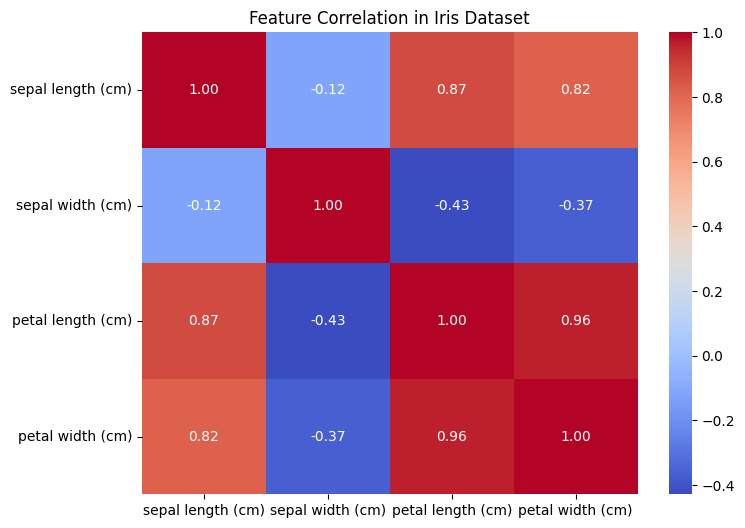

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation in Iris Dataset")
plt.show()


In [10]:
# Threshold for correlation
threshold = 0.85

# Find the columns that are highly correlated
corr_matrix = df.corr()

# Create a mask to identify highly correlated features
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation above the threshold
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print("Highly correlated features to remove:", highly_correlated)


Highly correlated features to remove: ['petal length (cm)', 'petal width (cm)']


In [12]:
# Drop highly correlated features
df_reduced = df.drop(columns=highly_correlated)

# Check the new shape of the DataFrame
print(df_reduced.shape)
df_reduced.head()

(150, 2)


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
